# Linear Stability Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

### Example:

**Comparing the stability of the logistic growth**

$$
    \dot N = rN\left(1 - \frac{N}{k}\right)
$$

In [3]:
def plot_logistic_growth(r, K, width=0.1, head_width=0.5):
    """
    Plot the logistic growh of a system with
    an equilibrium of K < 100
    """
    N = np.linspace(0, 100, 200)
    log_growth = r * N * (1 - N / K)

    N_sample = np.arange(0, 100, 10)
    log_growth_sample = r * N_sample * (1 - N_sample / K)
    for Ni, growth in zip(N_sample, log_growth_sample):
        sign = np.sign(growth)
        if sign != 0:
            plt.arrow(Ni, 0, sign * 3, 0, width=width, color="tab:red", head_width=head_width)
        else:
            plt.scatter(Ni, 0, c="black", s=100)
            
    plt.plot(N, log_growth)
    plt.ylabel(r"$\dot N$", fontsize=13)
    plt.xlabel(r"$rN\left(1 - \frac{N}{k}\right)$", fontsize=13)
    plt.title(rf"Vector field with $r={r}$, $K={K}$", fontsize=15)
    

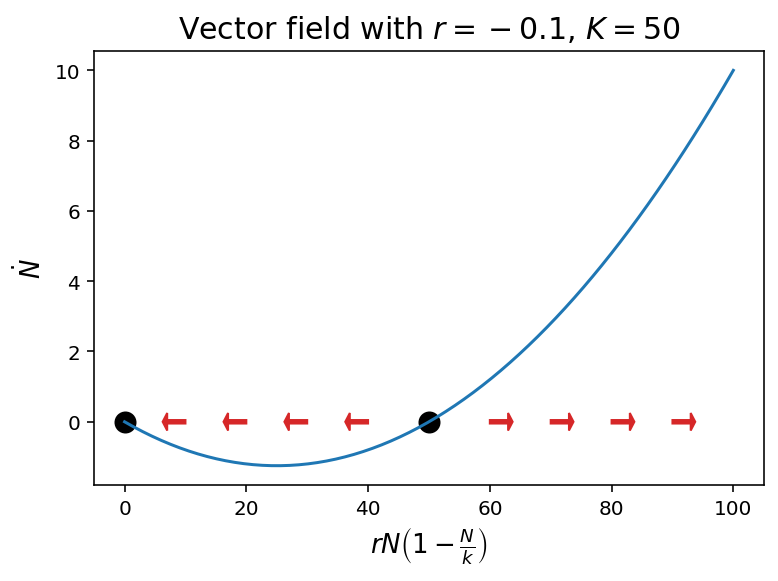

In [4]:
plot_logistic_growth(-0.1, 50)

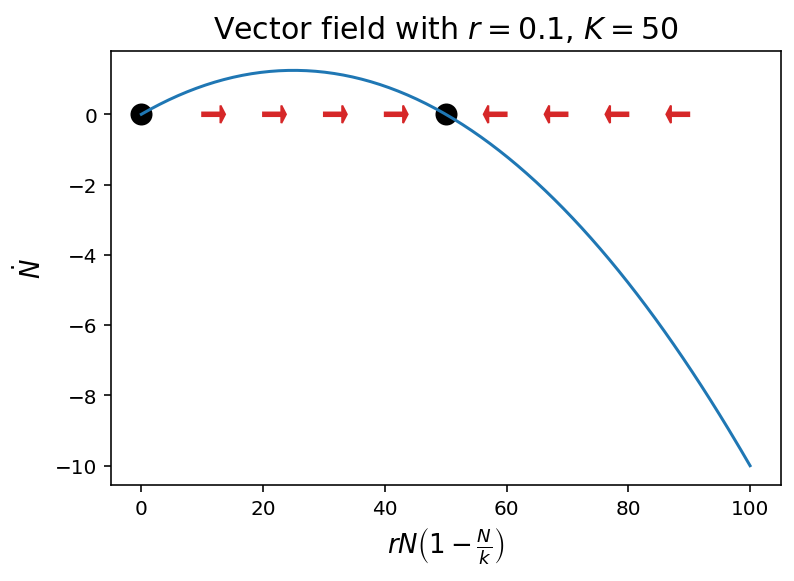

In [5]:
plot_logistic_growth(0.1, 50)

## Saddle nodes (an example)

$$
\dot x = x^2
$$

In [21]:
t = np.arange(-1, 2, 0.01)

def x(t, x0): return 1 / (1 / x0 - t) ** 2

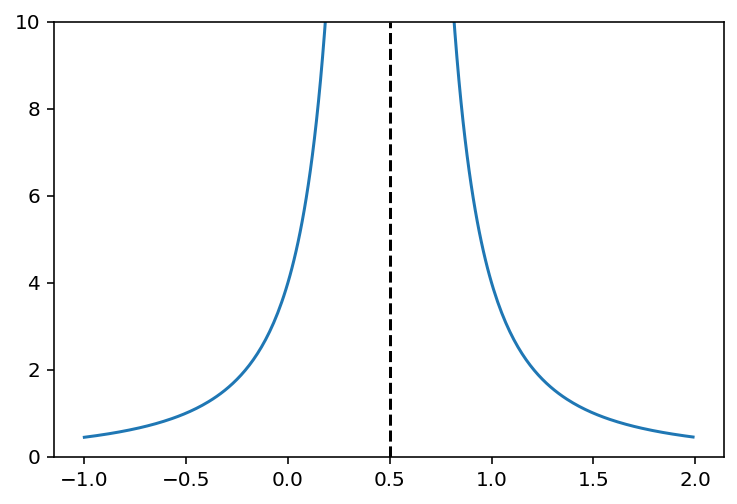

In [30]:
plt.plot(t, x(t, x0=2))
plt.ylim(0, 10)
plt.axvline(x=1/2, linestyle="--", c="black")